# Project 2

Group Member: Bryan Persaud, Matthew Baker, Zhi Ying Chen

1, Identify a large 2-node network dataset—you can start with a dataset in a repository.  

2, Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

3, Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd
import numpy as np
import math

Meetup.com is a website for people organizing and attending regular or semi-regular events ("meet-ups"). The relationships amongst users—who goes to what meetups—are a social network, ideal for graph-based analysis.

This dataset was generated for a talk titled Principles of Network Analysis with NetworkX, embedded online here (or with notebooks, etc. on Github). It forms the basis for a series of tutorials I presented on at PyNash and PyTennessee. In them, we work through the basics of graph theory and how to use NetworkX, a popular open-source Python package. We then apply this knowledge to extract insights about the social fabric of Tennessee MeetUp groups.


Load the dataset and take a quick look at the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Zchen116/data-620/main/member-to-group-edges.csv')

data.head(10)

,member_id,group_id,weight
0,2069,19277993,3
1,625050,19277993,2
2,1939496,19277993,1
3,2606806,19277993,4
4,3438546,19277993,1
5,4211111,19277993,1
6,4353024,19277993,5
7,5175848,19277993,1
8,5300858,19277993,1
9,5636006,19277993,1


In [29]:
# Total number of members
len(data.member_id.unique())

24631

In [30]:
# Total number of groups
len(data.group_id.unique())

602

In [3]:
#create graph object from data frame of edge list.
G = nx.from_pandas_edgelist(data, source='member_id', target='group_id', edge_attr=['weight'])

In [5]:
#members
members = data.iloc[:, 0].unique().tolist()

#groups
groups = data.iloc[:,1].unique().tolist()

#add the node type in bipartite
G.add_nodes_from(members, bipartite=0)
G.add_nodes_from(groups, bipartite=1)

In [ ]:
#nx.draw_spring(G,with_labels = False, node_color="steelblue", alpha=0.5)

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25233
Number of edges: 45583
Average degree:   3.6130


In [7]:
print("Number of Nodes: " + str(nx.number_of_nodes(G)))
print("Number of Edges: " + str(nx.number_of_edges(G)))

Number of Nodes: 25233
Number of Edges: 45583


In [25]:
#'mem' and 'grp' are set objects that contain the labels of member and group nodes.
mem,grp = bipartite.sets(G, set(members))

In [64]:
#Project bipartite graph on members
group_member = bipartite.weighted_projected_graph(G, grp)

In [65]:
print(nx.info(group_member))

Name: 
Type: Graph
Number of nodes: 602
Number of edges: 21390
Average degree:  71.0631


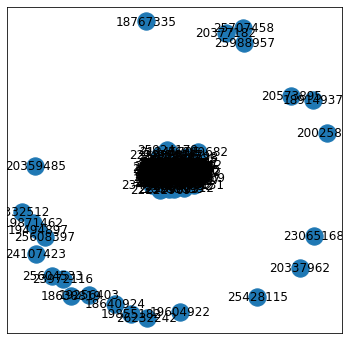

In [13]:
#Get an idea of the shape of the network
plt.figure(3,figsize=(6,6)) 
nx.draw_networkx(group_member)

# Strongest Group_Member

The edge weight between two groups represents the number of shared neighbors. In this case, the number of shared neighbors is the number of members that are common between the two groups.

In [112]:
strong_group_member = pd.DataFrame.from_dict(nx.get_edge_attributes(group_member, 'weight'), orient='index', columns=['Weight']) \
.sort_values(by=['Weight'], ascending=False).head()

strong_group_member

,Weight
"(16487812, 10016242)",211
"(11625832, 10016242)",159
"(18243826, 19728145)",156
"(10016242, 16477792)",152
"(18850080, 10016242)",148


# Explore Centrality Metrics

To determine the central nodes in each network, centrality measures were calculated and the relationship between them to gain better insight about networks.

In [66]:
# look at degree centrality
deg = nx.degree(group_member)
deg_list = sorted(group_member.degree, key=lambda x: x[1], reverse=True)
print ("Top 10 highest Degree:")
deg_list[0:10]

Top 10 highest Degree:


[(19728145, 348),
 (18955830, 341),
 (339011, 331),
 (1187715, 315),
 (4126912, 290),
 (1585196, 289),
 (18243826, 288),
 (18506072, 288),
 (18562307, 282),
 (19713173, 275)]

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes. Higher values of closeness indicate higher centrality. Below table display Closeness centrality

In [67]:
# look at closeness centrality
closeness_cen = nx.closeness_centrality(group_member)
closeness_list = sorted(closeness_cen.items(), key=lambda x: x[1], reverse=True)

print ("Top 10 highest Closeness:")
closeness_list[0:10]

Top 10 highest Closeness:


[(19728145, 0.6813756490310328),
 (18955830, 0.6763838860344684),
 (339011, 0.6666166097018407),
 (1187715, 0.653252833328101),
 (18506072, 0.6360027585100225),
 (4126912, 0.6338196826798966),
 (1585196, 0.6330953173282625),
 (18243826, 0.6316515423742641),
 (18562307, 0.6273594594136236),
 (19713173, 0.6238270300250334)]

Betweenness centrality is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node. Below table display Betweenness centrality

In [68]:
# look at betweenness centrality
betweenness_cen = nx.betweenness_centrality(group_member)
betweenness_list = sorted(betweenness_cen.items(), key=lambda x: x[1], reverse=True)

print ("Top 10 highest Betweenness:")
betweenness_list[0:10]

Top 10 highest Betweenness:


[(19728145, 0.030015970762234754),
 (339011, 0.02592070639403948),
 (18955830, 0.025020278314875757),
 (18243826, 0.019242249279074607),
 (1585196, 0.018428514318414652),
 (18506072, 0.017835909235902385),
 (22197221, 0.01704343348840584),
 (4126912, 0.016172614312809447),
 (1187715, 0.015915669723011415),
 (710272, 0.015617098168018841)]

Eigenvector centrality is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Below table display Eigenvector centrality

In [69]:
# look at eigenvector centrality
eigenvector_cen = nx.eigenvector_centrality(group_member)
eigenvector_list = sorted(eigenvector_cen.items(), key=lambda x:x[1], reverse=True)

print("Top 10 highest Eigenvector:")
eigenvector_list[0:10]

Top 10 highest Eigenvector:


[(19728145, 0.11470033112711088),
 (18955830, 0.11362814248936419),
 (339011, 0.11301935097855824),
 (1187715, 0.11044249697635623),
 (4126912, 0.10770572301602385),
 (18506072, 0.10675114686845116),
 (18562307, 0.10413264682420126),
 (1585196, 0.10344500792759027),
 (19713173, 0.1004539724940041),
 (18494105, 0.09802741083855707)]

Comparison between these centrality

In [109]:
## get the top nodes
top_deg = deg_list[0:10]
top_closeness = closeness_list[0:10]
top_between = betweenness_list[0:10]
top_eigenvector = eigenvector_list[0:10]

## combine them together to make a comparison chart
combine = np.hstack((top_deg, top_closeness, top_between, top_eigenvector))

cent_measures=pd.DataFrame(combine, columns=['Node', 'Degree', 'Node', 'Closeness', 'Node', 
                                           'Betweenness', 'Node', 'Eigenvector'])

cent_measures

,Node,Degree,Node,Closeness,Node,Betweenness,Node,Eigenvector
0,19728145.0,348.0,19728145.0,0.681376,19728145.0,0.030016,19728145.0,0.114700
1,18955830.0,341.0,18955830.0,0.676384,339011.0,0.025921,18955830.0,0.113628
2,339011.0,331.0,339011.0,0.666617,18955830.0,0.025020,339011.0,0.113019
3,1187715.0,315.0,1187715.0,0.653253,18243826.0,0.019242,1187715.0,0.110442
4,4126912.0,290.0,18506072.0,0.636003,1585196.0,0.018429,4126912.0,0.107706
5,1585196.0,289.0,4126912.0,0.633820,18506072.0,0.017836,18506072.0,0.106751
6,18243826.0,288.0,1585196.0,0.633095,22197221.0,0.017043,18562307.0,0.104133
7,18506072.0,288.0,18243826.0,0.631652,4126912.0,0.016173,1585196.0,0.103445
8,18562307.0,282.0,18562307.0,0.627359,1187715.0,0.015916,19713173.0,0.100454
9,19713173.0,275.0,19713173.0,0.623827,710272.0,0.015617,18494105.0,0.098027


# Ego Network

The neighborhood graph of a given graph from a vertex v is the subgraph induced by the neighborhood of a graph from vertex v, most commonly including v itself. Such graphs are sometimes also known in more recent literature as ego graphs or ego-centered networks.

We want to view connections related to one individual. From the above explore of centrality matrics, we can see 19728145 is always the first one of the dataset, which means 19728145 is the most influential members, so we will use this as an example to create an ego network.

In [70]:
nx.ego_graph(group_member, 19728145)
ego_net=nx.ego_graph(group_member, 19728145)
print(nx.info(ego_net))

Name: 
Type: Graph
Number of nodes: 349
Number of edges: 16052
Average degree:  91.9885


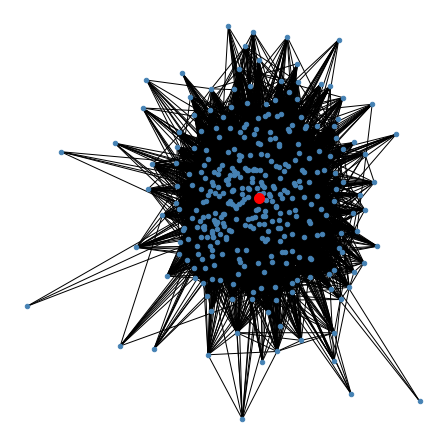

In [56]:
# Set size
plt.figure(3,figsize=(6,6)) 

# Draw graph
pos = nx.spring_layout(ego_net)
nx.draw(ego, pos, node_color='steelblue', node_size=20)

# Draw ego as large and red
nx.draw_networkx_nodes(ego_net, pos, nodelist=[19728145], node_size=100, node_color='red')
plt.show()

# Network Reduction

It is clear that the network has a number of distinct clusters; we will now try to reduce the size of the network using the island method from “Islands in the Net”. The island method works as follows: imagine our network as an island with a complex
terrain, where the height of each point on the terrain is defined by the value of a node
(e.g., degree centrality) or edge (e.g., number of retweets).

In [60]:
# Trimming edges based on edge weight
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

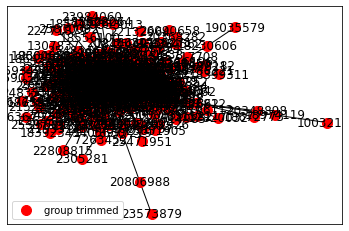

In [93]:
# Trimming the group_member network
group_trim = trim_edges(group_member,weight= math.exp(0.9))

### re-calculate weights based on the new graph
weights = [edata['weight'] for f,t,edata in group_trim.edges(data=True)]

nx.draw_networkx(group_trim, label = 'group_trim', node_color='red',with_labels=True,node_size =100)
plt.legend(["group trimmed"])
plt.show()

In [61]:
#function for island method
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [71]:
islands=island_method(group_member)

In [88]:
for i in islands:
    print (i[0],len(i[1]), nx.number_connected_components(i[1]))

1 472 2
43 63 5
85 23 4
127 12 3
169 2 1


For groups that share 1 member, there are 472 nodes, and the network separates into 2 island subgraphs.

For groups that share 43 members, there are 63 nodes, and the network separates into 5 island subgraphs.

For groups that share 85 members, there are 23 nodes, and the network separates into 4 island subgraphs.

For groups that share 127 members, there are 12 nodes, and the network separates into 3 island subgraphs.

For groups that share 169 members, there are 2 nodes, and the network separates into 1 island subgraphs.

Running Island method on group_member subgraph, we will look at centrality measures to gain better insight about networks.

In [102]:
# Degree centrality
deg_cen = nx.degree_centrality(group_trim)
df_degree = pd.DataFrame.from_dict(deg_cen,orient = 'index',columns = ['weight'])
((df_degree.sort_values(by='weight',ascending = False))).head()

,weight
18955830,0.4550
19728145,0.4400
339011,0.4225
4126912,0.4000
18506072,0.3700


In [95]:
# Closeness centrality
clos_cen = nx.closeness_centrality(group_trim)
df_close = pd.DataFrame.from_dict(clos_cen,orient = 'index',columns = ['weight'])
((df_close.sort_values(by='weight',ascending = False))).head()

,weight
18955830,0.625000
19728145,0.620155
339011,0.615385
4126912,0.603318
18506072,0.593472


In [96]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(group_trim)
df_bet = pd.DataFrame.from_dict(bet_cen, orient = 'index', columns =['weight'])
((df_bet.sort_values(by='weight', ascending = False))).head()

,weight
339011,0.085295
18955830,0.083066
19728145,0.076509
4126912,0.063558
18506072,0.047646


In [98]:
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(group_trim)
df_eig = pd.DataFrame.from_dict(eig_cen, orient = 'index', columns =['weight'])
((df_eig.sort_values(by='weight', ascending = False))).head()

,weight
4126912,0.165862
19728145,0.153856
18955830,0.151918
339011,0.149838
18506072,0.148199


In [111]:
strong_relation = pd.DataFrame.from_dict(nx.get_edge_attributes(group_trim, 'weight'), orient='index', columns=['Weight']) \
.sort_values(by=['Weight'], ascending=False).head()
strong_relation

,Weight
"(16487812, 10016242)",211
"(11625832, 10016242)",159
"(18243826, 19728145)",156
"(16477792, 10016242)",152
"(18850080, 10016242)",148


# Conclusion

There are 602 Meetup groups. After we use the Island Method to reduce the network to make 602 Meetup groups down to 349 Meetup groups. To determine the central nodes in each network, centrality measures were calculated and the relationship between them was calculated using different methods. We clearly see that group_member 19728145, 18955830, 339011, 1187715 and 4126912 are the most influential and efficent at spreading information through the graph. Also, we clearly see the group number (16487812, 10016242), (11625832, 10016242), (18243826, 19728145), (16477792, 10016242), (18850080, 10016242) has the strongest relationship out of all group.

# Video Presentation

The video presentation can be found [here](https://youtu.be/VJ_lEwxdQ1Q).